In [1]:
# Imports:
import pandas as pd
import numpy as np

from IPython.display import YouTubeVideo

# Disable jedi autocompleter
%config Completer.use_jedi = False

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format


# Simpson's Paradox

> Datasets look different at granularities


Simpson's Paradox is an interesting statistical property that arises when you arrive at misleading conclusions due to overlooking confounding variables in your data.  
Ultimately, the only way to overcome the paradox is a thorough understanding of your data and that it represents.

Watch the following video if you want to gain some intuition with simple examples:

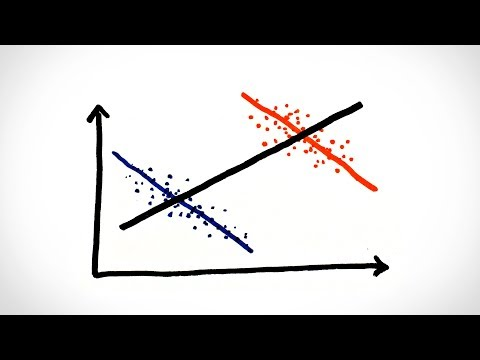

In [14]:
YouTubeVideo("ebEkn-BiW5k")

## What is it? And Why is it important?

* Simpson's paradox, also called Yule-Simpson effect, in statistics. It is an effect that occurs when the marginal association between two categorical variables is qualitatively different from the partial association between the same two variables after controlling for one or more other variables.

Simpson's paradox is important for three critical reasons:  
1. People often expect statistical relationships to be immutable. They often are not. The relationship between two variables might increase, decrease, or even change direction depending on the set of variables being controlled.
2. Simpson’s paradox is not simply an obscure phenomenon of interest only to a small group of statisticians. Simpson’s paradox is actually one of a large class of association paradoxes.
3. Simpson’s paradox reminds researchers that causal inferences, particularly in nonexperimental studies, can be hazardous. Uncontrolled and even unobserved variables that would eliminate or reverse the association observed between two variables might exist.

<img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/Simpsons_paradox_-_animation.gif" style="zoom:70%" alt="Simpson's paradox" />

> Simpson's paradox for quantitative data: a positive trend  appears for separate groups, whereas a negative trend  appears when the groups are combined. Visualization of Simpson's paradox on data resembling real-world variability indicates that risk of misjudgement of true relationship can be hard to spot -- Wiki

## Gender Bias In Graduate School Admissions

One of the best-known examples of Simpson's paradox comes from a study of gender bias among graduate school admissions to University of California, Berkeley. The admission figures for the fall of 1973 showed that men applying were more likely than women to be admitted, and the difference was so large that it was unlikely to be due to chance.

Imagine you're analyzing gender differences in a university's admissions rate for graduate programs. You compute the proportion of successful female applicants and compare it to the proportion of successful male applicants, and get the following numbers:

In [2]:
# Load the data
data = pd.read_csv('data/admission_data.csv')
data.head()

,student_id,gender,major,admitted
0,35377,female,Chemistry,False
1,56105,male,Physics,True
2,31441,female,Chemistry,False
3,51765,male,Physics,True
4,53714,female,Physics,True


In [3]:
# Total number of applicants
admission_count = data.shape[0]
print(f"Total number of applicants: {admission_count}")

Total number of applicants: 500


In [24]:
# Create a new dataframe
df = pd.DataFrame()
# Number of applicants per gender
df['application'] = data.groupby('gender').count()['student_id']
# Rate of applicants per gender
df['%-application'] = df['application']/admission_count
# Number of admitted per gender
df['admission'] = data.query('admitted == True').groupby(['gender']).count()['admitted']
# Rate of admitted per gender
df['%-admission'] = df['admission']/df['application']

In [25]:
df

,application,%-application,admission,%-admission
gender,,,,
female,257,0.51,74,0.29
male,243,0.49,118,0.49


From the table above you can see that females are less likely to get admitted than males. Indeed only 29% of the female applicants were admitted, while almost 50% of all male applicants were admitted.  
Intrigued, you decide to dig deeper, and compute the proportion of successful applicants of each graduate program per gender separately. Then you get the following table:

In [26]:
deeper = pd.DataFrame()
deeper['application'] = data.groupby(['gender', 'major']).count()['admitted']
deeper['admission'] = data.query('admitted == True').groupby(['gender', 'major']).count()['admitted']
deeper['%-admission'] = deeper['admission'] / deeper['application']
deeper

application  admission  %-admission
gender major                                         
female Chemistry          226         51         0.23
       Physics             31         23         0.74
male   Chemistry           18          2         0.11
       Physics            225        116         0.52

When broken down by department, females appear to have a better chance of being admitted than males. Exactly the opposite of what you observed above.